1. Change directory
2. import required libraries


In [149]:
import os
import pandas as pd
import re as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('C:\Kaggle\Titanic')
currentDirectory = os.getcwd()
currentDirectory

'C:\\Kaggle\\Titanic'

Exploring Data
Analyzing Data
Filling NA with Median Age

In [150]:
train=pd.read_csv('train.csv')
print(train.info())
train_1=train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

train_1.head()
med_age=train_1['Age'].median()
med_Fare=train_1['Fare'].median()
train_1['Age'] = train_1['Age'].fillna(train_1['Age'].median())
train_1.info()
med_age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage

28.0

Getting Dummies for Variables

In [151]:
columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X=pd.get_dummies(train_1[columns])
print(X.head())
y=train_1['Survived']


   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


Trying AdaBoostClassifier

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8070407445668769

Define Function to be used to compare different models

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold

from numpy import mean
from numpy import std
# Different models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier(n_neighbors=20)
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['AdaBoostClassifier']=AdaBoostClassifier(n_estimators=100)
    models['RandomForestClassifier']=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    return models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.798 (0.031)
>knn 0.708 (0.041)
>cart 0.792 (0.040)
>svm 0.733 (0.047)
>bayes 0.789 (0.034)
>AdaBoostClassifier 0.808 (0.042)
>RandomForestClassifier 0.824 (0.035)


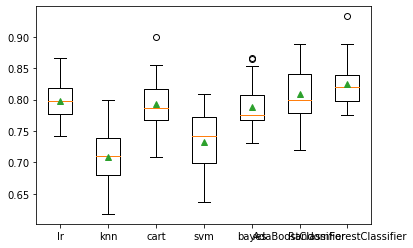

In [154]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Prepparing Data for testing

In [156]:
test=pd.read_csv('test.csv')

test_1=test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

train_1.head()

test_1['Age'] = test_1['Age'].fillna(med_age)
test_1['Fare'] = test_1['Fare'].fillna(med_Fare)
X_test=pd.get_dummies(test_1[columns])

print(X_test.head())
X_test.info()

   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  34.5      0      0   7.8292           0         1           0   
1       3  47.0      1      0   7.0000           1         0           0   
2       2  62.0      0      0   9.6875           0         1           0   
3       3  27.0      0      0   8.6625           0         1           0   
4       3  22.0      1      1  12.2875           1         0           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Em

Model Prediction

In [157]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rfc.fit(X,y)
X_test_array=np.array(X_test)
print(X_test_array)
pred=rfc.predict(X_test)
pred=pred.reshape((-1, 1))


[[ 3.  34.5  0.  ...  0.   1.   0. ]
 [ 3.  47.   1.  ...  0.   0.   1. ]
 [ 2.  62.   0.  ...  0.   1.   0. ]
 ...
 [ 3.  38.5  0.  ...  0.   0.   1. ]
 [ 3.  28.   0.  ...  0.   0.   1. ]
 [ 3.  28.   1.  ...  1.   0.   0. ]]


Make Prediction File

In [159]:
Prediction=pd.DataFrame(test['PassengerId'])

Prediction['Survived']=pd.DataFrame(pred)
print(Prediction.shape)


(418, 2)


Saving File

In [161]:
Prediction.to_csv('Prediction.csv',index=False)